# CYCLISTIC BIKE-SHARE CASE STUDY

### Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director
of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives
must approve your recommendations, so they must be backed up with compelling data insights and professional data
visualizations.

### About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders.

### Stakeholders

**Lily Moreno**: The director of marketing and your manager. Moreno is responsible for the development of campaigns
and initiatives to promote the bike-share program. These may include email, social media, and other channels.  

**Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and
reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy
learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic
achieve them.  

**Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the
recommended marketing program.

## 1. Ask
How do annual members and casual riders use Cyclistic bikes differently?

## 2. Prepare
I have used Divvy Bike data obtained from the Divvy [Bike website](https://divvy-tripdata.s3.amazonaws.com/index.html).  

We will be working with 12 CSV files, comprehending the datasets between ‘202106-divvy-tripdata’ and ‘202205-divvy-tripdata’. This data corresponds to the period between June 2021 and May 2021. Data was organized by month and saved as .csv files within .zip archives. I downloaded each month to my local computer and combined 12 months data into 1 csv file using python notebook.    

The data source is reliable, original, comprehensive, current and cited. The data has been made available under this [license](https://ride.divvybikes.com/data-license-agreement).



## 3. Process
We will begin loading the libraries and data sets. Next, we'll perform data exploration by getting an overview of the data sets, checking the data types, and cleaning the data.

#### **Import the corresponding libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#### **Load all 12 datasets and combine them into one.**

In [2]:
df_2106 = pd.read_csv('202106-divvy-tripdata.csv')
df_2107 = pd.read_csv('202107-divvy-tripdata.csv')
df_2108 = pd.read_csv('202108-divvy-tripdata.csv')
df_2109 = pd.read_csv('202109-divvy-tripdata.csv')
df_2110 = pd.read_csv('202110-divvy-tripdata.csv')
df_2111 = pd.read_csv('202111-divvy-tripdata.csv')
df_2112 = pd.read_csv('202112-divvy-tripdata.csv')
df_2201 = pd.read_csv('202201-divvy-tripdata.csv')
df_2202 = pd.read_csv('202202-divvy-tripdata.csv')
df_2203 = pd.read_csv('202203-divvy-tripdata.csv')
df_2204 = pd.read_csv('202204-divvy-tripdata.csv')
df_2205 = pd.read_csv('202205-divvy-tripdata.csv')

data = pd.concat([df_2106,df_2107,df_2108,df_2109,df_2110,df_2111,df_2112,df_2201,df_2202,df_2203,df_2204,df_2205])

In [3]:
data.sample(6)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
338010,A3872C203263C257,electric_bike,2022-04-10 09:47:07,2022-04-10 09:51:05,Kingsbury St & Erie St,13265,Desplaines St & Kinzie St,TA1306000003,41.893649,-87.641458,41.888716,-87.644448,member
446867,E5F2FBEC914747C9,electric_bike,2021-10-17 10:44:49,2021-10-17 10:59:24,Racine Ave & Washington Blvd,654,Wells St & Concord Ln,TA1308000050,41.883074,-87.657032,41.911877,-87.634723,member
288958,127F02E0A8BAFB58,classic_bike,2021-09-04 18:28:32,2021-09-04 18:50:00,Greenview Ave & Diversey Pkwy,13294,Clark St & Lincoln Ave,13179,41.932590,-87.665936,41.915689,-87.634600,casual
40161,09A464A9B31AC796,electric_bike,2021-06-23 18:55:46,2021-06-23 19:04:29,Damen Ave & Leland Ave,TA1307000158,Winthrop Ave & Lawrence Ave,TA1308000021,41.967154,-87.678971,41.969039,-87.657713,member
78450,4A44BD98F200E1E8,classic_bike,2021-08-15 15:13:48,2021-08-15 15:29:29,2112 W Peterson Ave,KA1504000155,Warren Park East,RP-002,41.991178,-87.683593,42.004550,-87.680666,member
210907,3BCF49F718710B5B,classic_bike,2021-08-06 19:14:06,2021-08-06 19:24:41,Loomis St & Lexington St,13332,Blue Island Ave & 18th St,13135,41.872187,-87.661501,41.857556,-87.661535,member


#### **How many rows and columns are there in the dataframe?**

In [4]:
data.shape # We have 5860776 rows and 13 columns

(5860776, 13)

#### **Checking the data types in the dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860776 entries, 0 to 634857
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 626.0+ MB


#### **Check for null values**

In [6]:
data.isna().sum()/data.shape[0] * 100

ride_id                0.000000
rideable_type          0.000000
started_at             0.000000
ended_at               0.000000
start_station_name    14.045358
start_station_id      14.045307
end_station_name      14.986718
end_station_id        14.986718
start_lat              0.000000
start_lng              0.000000
end_lat                0.085927
end_lng                0.085927
member_casual          0.000000
dtype: float64

##### Columns that have null values ​​are not needed for our analysis, so by removing them we won't lose any relevant information.

#### **We reset the index because when combining the datasets they are duplicated.**    
#### **Drop unnecesary columns.**    
#### **Remove duplicates if any.**

In [7]:
data.reset_index(inplace=True)
data = data.drop(columns = ['index', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'])
data = data.drop_duplicates()

In [8]:
data.shape # We have sames rows and only 5 columns.

(5860776, 5)

In [9]:
data.isna().sum()/data.shape[0] * 100

ride_id          0.0
rideable_type    0.0
started_at       0.0
ended_at         0.0
member_casual    0.0
dtype: float64

In [10]:
data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,member
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,member
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,member
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,member
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,member


## 4. Analyze

#### **We need to change the data type from columns started_at and ended_at to datetime to perform calculations.**

In [11]:
data.started_at = pd.to_datetime(data.started_at)

data.ended_at = pd.to_datetime(data.ended_at)

#### **Creating a ride length column.**  
  ##### The column will have a data type of timedelta in minutes, so we need to change it to int.

In [12]:
data['ride_length'] = (data.ended_at - data.started_at) / datetime.timedelta(minutes=1)
data.ride_length = data.ride_length.astype('int32')

#### **Creating a day of the week column.**

In [13]:
data['day_of_week'] = data.started_at.dt.day_name()

#### **Removing outliers.**
  ##### We need to check if there are ride length values ​​that are equal to or less than 0, and also those that exceed 1440 minutes, which would correspond to a whole day and could interfere with our analysis.

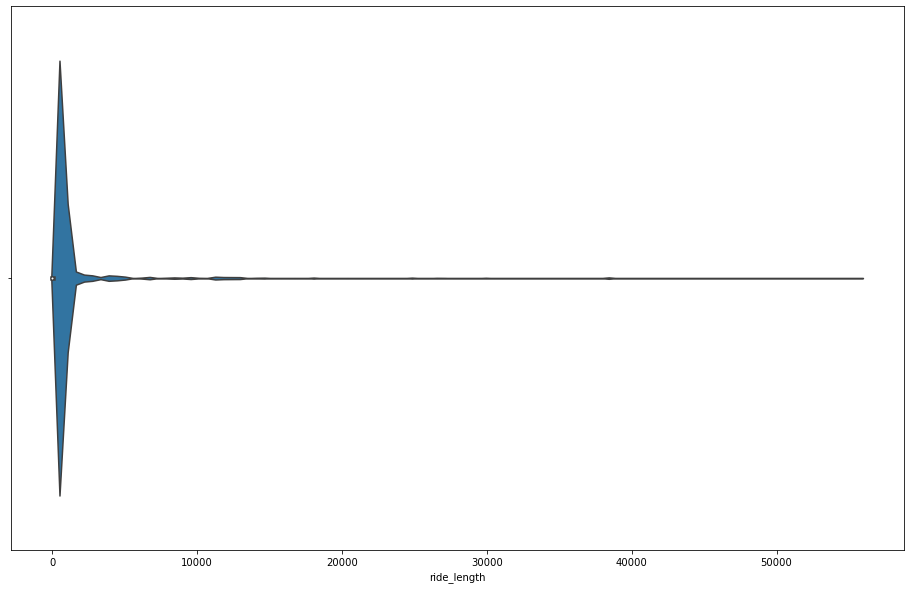

In [14]:
plt.figure(figsize=(16,10))
sns.violinplot(x=data.ride_length, data=data)
plt.show();

#### **How many rows are equal to or less than 0?**

In [15]:
len(data.loc[data.ride_length <= 0])

95907

#### **How many rows exceed 1440 minutes?**

In [16]:
len(data.loc[data.ride_length >= 1440])

4406

#### **Drop the outliers.**
 ##### We have deleted 100313 rows.

In [17]:
data = data.drop(data[(data.ride_length <= 0) | (data.ride_length > 1440)].index)

In [18]:
data.shape 

(5760465, 7)

#### Now our dataset looks like this.

In [19]:
data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,ride_length,day_of_week
0,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,member,2,Sunday
1,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,member,6,Friday
2,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,member,5,Friday
3,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,member,25,Thursday
4,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,member,4,Friday


#### Mean of ride length by users

In [20]:
data.groupby('member_casual', as_index=True)[['ride_length']].mean()

,ride_length
member_casual,
casual,25.378824
member,12.536393


#### Max ride length by users after the analysis.

In [21]:
data.groupby('member_casual', as_index=True)[['ride_length']].max()

,ride_length
member_casual,
casual,1440
member,1439


### Mode of day of week

In [30]:
data.day_of_week.mode()

0    Saturday
dtype: object

## 5. Share

#### **Visualizing Rides by User Type.**

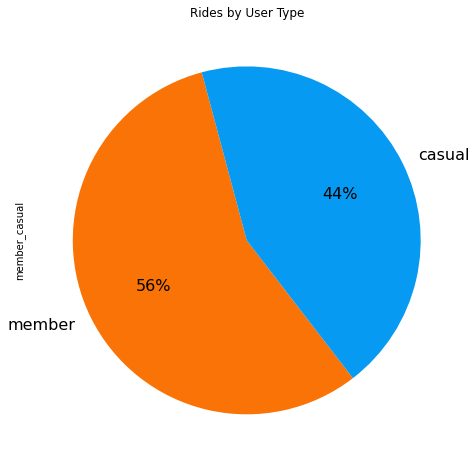

In [33]:
data.member_casual.value_counts(normalize=True).plot(kind='pie',
                                                     autopct='%1.0f%%',
                                                     startangle=105,
                                                     title='Rides by User Type',
                                                     figsize=(12, 8),
                                                     colors=['#F97306','#069AF3'],
                                                     fontsize='16');

#### **Visualizing Average Ride Length.**

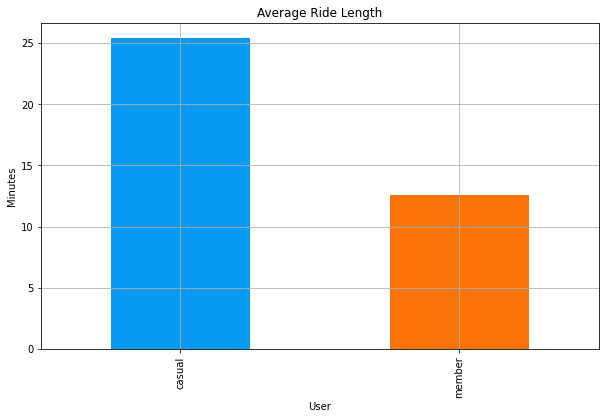

member_casual
casual    25.378824
member    12.536393
Name: ride_length, dtype: float64

In [24]:
df=data.groupby(['member_casual']).mean().ride_length
    
ax=df.plot(kind='bar',
                grid=True,
                figsize=(10, 6),
                color=['#069AF3', '#F97306'])

ax.set_title('Average Ride Length')
ax.set_ylabel('Minutes')
ax.set_xlabel('User')

plt.show();
    
df

#### **Visualizing Average Ride Length by Day of the Week.**

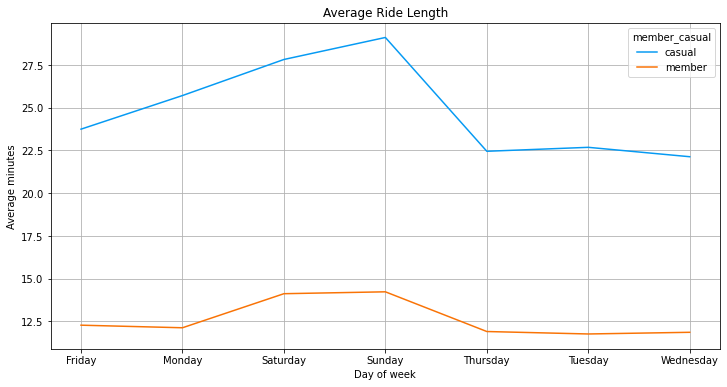

member_casual,casual,member
day_of_week,,
Friday,23.747910,12.282039
Monday,25.714089,12.131111
Saturday,27.824013,14.123537
Sunday,29.111667,14.233828
Thursday,22.454282,11.911348
Tuesday,22.685356,11.767745
Wednesday,22.135659,11.865768


In [25]:
df=data.groupby(['day_of_week','member_casual']).mean().ride_length
    
df=df.unstack().fillna(0)
    
ax=df.plot(kind='line',
                grid=True,
                figsize=(12, 6),
                color=['#069AF3', '#F97306'])

ax.set_title('Average Ride Length')
ax.set_ylabel('Average minutes')
ax.set_xlabel('Day of week')

plt.show();
    
df

#### **Visualizing total ride_ids by Day of the Week and Member_Casual.**

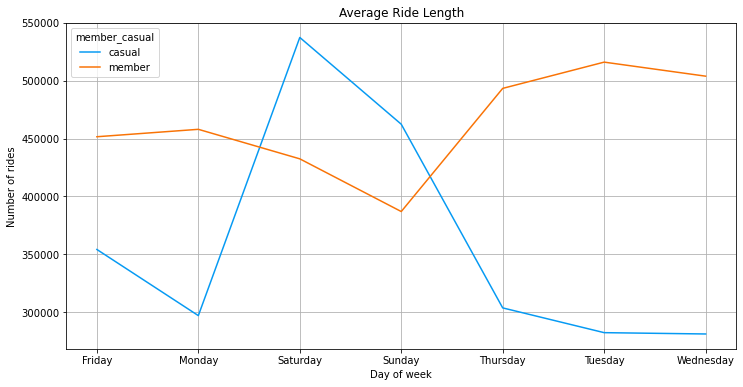

member_casual,casual,member
day_of_week,,
Friday,354231,451544
Monday,297138,457948
Saturday,537239,432462
Sunday,462347,386977
Thursday,303794,493289
Tuesday,282424,515950
Wednesday,281287,503835


In [26]:
df=data.groupby(['day_of_week', 'member_casual']).count().ride_id
    
df=df.unstack().fillna(0)
    
ax=df.plot(kind='line',
                grid=True,
                figsize=(12, 6),
                color=['#069AF3', '#F97306'])

ax.set_title('Average Ride Length')
ax.set_ylabel('Number of rides')
ax.set_xlabel('Day of week')

plt.show();
    
df

## 6. Act

##### At this point it is time to present our key findings and communicate our recommendations to the Cyclistic marketing team.

#### **Key Findings.**  
* Annual members are the majority of users, making up for 56% of Cyclistic's customers.  
* The average time per trip of casual riders is even more than annual customers.
* Casual riders, as well as members, take longer rides on the weekends.
* Member riders take more trips on weekends, while casual riders take more trips Tuesday through Thursday.

#### **Recomendations.**
* Increase marketing campaign targeted at casual riders through email and app notifications. The ads could offer special discounts for the annual membership in order to encourage casual riders to make the switch.  
* Since casual cyclists don't rent bikes as much as members do on the weekends, Cyclistic's marketing team should also consider creating different membership types.  
* Cyclistic could look into partnering with local businesses and offering deals at places like gyms, movie theaters, bars, restaurants... Focusing on these entertainment segments could incentivize casual riders to sign up for annual membership.